# **Covid-19 Detector**
### I have used the data from "**Code Block**" website. The data contained 224 images for training. And 60 images for validation. The link to the data is [http://cb.lk/covid_19](http://cb.lk/covid_19)

In [ ]:
!wget http://cb.lk/covid_19

--2022-01-03 18:03:32--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-01-03 18:03:33--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-01-03 18:03:33--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-01

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
train_path='CovidDataset/Train'
val_path='CovidDataset/Val'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.callbacks import History

history=History()

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
train_datagen=image.ImageDataGenerator(horizontal_flip=True, rescale=1./255, shear_range=0.2, zoom_range=0.2)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory('CovidDataset/Train',
  target_size=(224,224),
  batch_size=32,
  class_mode='binary')

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
valid_generator=test_dataset.flow_from_directory('CovidDataset/Val',
  target_size=(224,224),
  batch_size=32,
  class_mode='binary')

Found 60 images belonging to 2 classes.


In [ ]:
final_gen=model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=[history]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
7/7 [==============================] - 67s 9s/step - loss: 0.1217 - accuracy: 0.9509 - val_loss: 0.0622 - val_accuracy: 0.9667
Epoch 2/10
7/7 [==============================] - 65s 9s/step - loss: 0.1187 - accuracy: 0.9509 - val_loss: 0.0531 - val_accuracy: 0.9833
Epoch 3/10
7/7 [==============================] - 65s 9s/step - loss: 0.0858 - accuracy: 0.9643 - val_loss: 0.0597 - val_accuracy: 0.9667
Epoch 4/10
7/7 [==============================] - 65s 9s/step - loss: 0.0971 - accuracy: 0.9777 - val_loss: 0.0560 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 65s 9s/step - loss: 0.0919 - accuracy: 0.9598 - val_loss: 0.0464 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 66s 9s/step - loss: 0.0832 - accuracy: 0.9598 - val_loss: 0.0409 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 66s 9s/step - loss: 0.1726 - accuracy: 0.9509 - val_loss: 0.0517 - val_accuracy: 0.9667
Epoch 8/10
7/7 [==================

ValueError: ignored

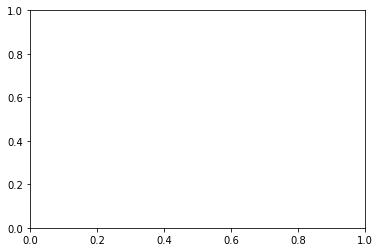

In [ ]:
loss_train=final_gen.history['loss']
loss_vald=final_gen.history['val_loss']
epochs=range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_vald, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

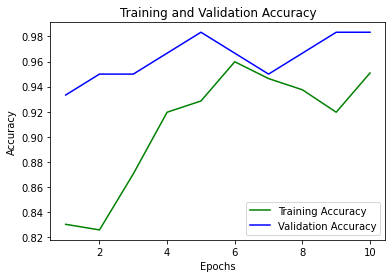

In [ ]:
loss_train=final_gen.history['accuracy']
loss_vald=final_gen.history['val_accuracy']
epochs=range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_vald, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()